In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('coin_Bitcoin.csv')

In [107]:
df.shape

(2991, 10)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [109]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [110]:
df.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


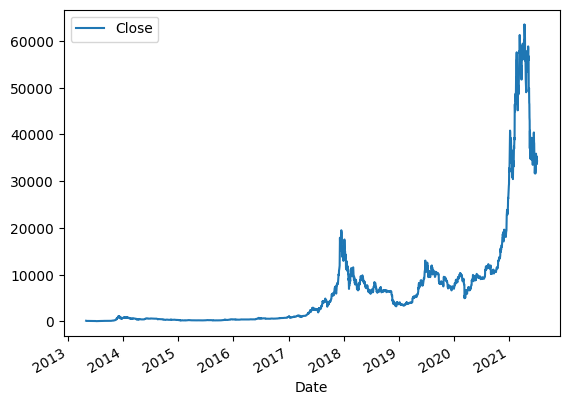

In [111]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
plot = df.plot(x='Date', y='Close')
plt.show()

In [112]:
df['Date'] = pd.to_datetime(df['Date'])

In [113]:
df = df.set_index("Date")[["Open", "High", "Low", "Close", "Volume"]].copy()

print("Raw shape:", df.shape, "min:", df.index.min(), "max:", df.index.max())
print(df.head())

Raw shape: (2991, 5) min: 2013-04-29 23:59:59 max: 2021-07-06 23:59:59
                           Open        High         Low       Close  Volume
Date                                                                       
2013-04-29 23:59:59  134.444000  147.488007  134.000000  144.539993     0.0
2013-04-30 23:59:59  144.000000  146.929993  134.050003  139.000000     0.0
2013-05-01 23:59:59  139.000000  139.889999  107.720001  116.989998     0.0
2013-05-02 23:59:59  116.379997  125.599998   92.281898  105.209999     0.0
2013-05-03 23:59:59  106.250000  108.127998   79.099998   97.750000     0.0


In [114]:
df = df[df.index >= "2017-01-01"].copy()
print("After cutoff (>=2017):", df.shape, "min:", df.index.min(), "max:", df.index.max())


After cutoff (>=2017): (1648, 5) min: 2017-01-01 23:59:59 max: 2021-07-06 23:59:59


In [115]:
# log return текущего дня
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

# target = log_return(t+1)
df["target"] = df["log_return"].shift(-1)


In [116]:
# ---- лаги цены
for lag in [1, 2, 3, 7]:
    df[f"close_lag_{lag}"] = df["Close"].shift(lag)

# ---- лаги доходностей
for lag in [1, 2, 5]:
    df[f"ret_lag_{lag}"] = df["log_return"].shift(lag)

# ---- rolling по цене (только прошлое: shift(1))
for w in [7, 14, 30]:
    df[f"roll_mean_{w}"] = df["Close"].rolling(w).mean().shift(1)
df["roll_std_7"]  = df["Close"].rolling(7).std().shift(1)
df["roll_std_30"] = df["Close"].rolling(30).std().shift(1)

# ---- rolling волатильности доходностей
df["roll_ret_std_30"] = df["log_return"].rolling(30).std().shift(1)

# ---- EMA по цене (shift(1) чтобы не смотреть на текущий Close как "завтра")
df["ema_7"]  = df["Close"].ewm(span=7, adjust=False).mean().shift(1)
df["ema_14"] = df["Close"].ewm(span=14, adjust=False).mean().shift(1)

# ---- time features
df["weekday"] = df.index.weekday
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# ---- итоговая чистка
df = df.dropna().copy()
print("After features:", df.shape)
print("Columns:", len(df.columns))


After features: (1616, 24)
Columns: 24


In [117]:
split = int(len(df) * 0.85)
train = df.iloc[:split].copy()
test  = df.iloc[split:].copy()

X_train = train.drop(columns=["target"])
y_train = train["target"]

X_test  = test.drop(columns=["target"])
y_test  = test["target"]

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1373, 23) Test: (243, 23)


In [118]:
def report(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    print(f"{name:22s} | MAE={mae:,.6f} RMSE={rmse:,.6f} MAPE={mape:.2f}%")
    return mae, rmse, mape

def returns_to_price(close_today, pred_return):
    # Price(t+1) = Close(t) * exp(pred_return(t+1))
    return close_today * np.exp(pred_return)

def report_price(name, actual_price, pred_price):
    mae = mean_absolute_error(actual_price, pred_price)
    rmse = np.sqrt(mean_squared_error(actual_price, pred_price))
    mape = mean_absolute_percentage_error(actual_price, pred_price) * 100
    print(f"{name:22s} | MAE={mae:,.2f} RMSE={rmse:,.2f} MAPE={mape:.2f}%")
    return mae, rmse, mape


In [119]:
# y_test - это log_return(t+1)
pred_ret_zero = np.zeros_like(y_test.values)

print("\n=== RETURNS METRICS ===")
report("Baseline: 0 return", y_test.values, pred_ret_zero)

# восстановим цену
close_today = X_test["Close"].values
pred_price_zero = returns_to_price(close_today, pred_ret_zero)

# actual price(t+1) у нас есть как: Close(t) * exp(y_test)
actual_price = returns_to_price(close_today, y_test.values)

print("\n=== PRICE METRICS ===")
report_price("Baseline (price naive)", actual_price, pred_price_zero)



=== RETURNS METRICS ===
Baseline: 0 return     | MAE=0.033860 RMSE=0.045710 MAPE=100.00%

=== PRICE METRICS ===
Baseline (price naive) | MAE=1,329.03 RMSE=1,871.05 MAPE=3.38%


(1329.0277995837453, np.float64(1871.047234622148), 3.3807446341872014)

In [120]:
pred_ret_yesterday = X_test["ret_lag_1"].values

print("\n=== RETURNS METRICS ===")
report("Baseline: ret = yesterday", y_test.values, pred_ret_yesterday)

pred_price_ret1 = returns_to_price(close_today, pred_ret_yesterday)
print("\n=== PRICE METRICS ===")
report_price("Baseline (ret_lag_1)", actual_price, pred_price_ret1)



=== RETURNS METRICS ===
Baseline: ret = yesterday | MAE=0.050264 RMSE=0.063419 MAPE=1153.80%

=== PRICE METRICS ===
Baseline (ret_lag_1)   | MAE=1,950.76 RMSE=2,554.15 MAPE=5.03%


(1950.7612618616965, np.float64(2554.151784792266), 5.030837916638763)

In [121]:
pip install lightgbm


In [122]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.02,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)
pred_ret_lgb = lgb_model.predict(X_test)

print("\n=== RETURNS METRICS ===")
report("LightGBM", y_test.values, pred_ret_lgb)

pred_price_lgb = returns_to_price(close_today, pred_ret_lgb)

print("\n=== PRICE METRICS ===")
report_price("LightGBM (price)", actual_price, pred_price_lgb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5364
[LightGBM] [Info] Number of data points in the train set: 1373, number of used features: 23
[LightGBM] [Info] Start training from score 0.002008

=== RETURNS METRICS ===
LightGBM               | MAE=0.055056 RMSE=0.067038 MAPE=1374.51%

=== PRICE METRICS ===
LightGBM (price)       | MAE=2,086.55 RMSE=2,655.86 MAPE=5.31%


(2086.550799828791, np.float64(2655.8648091290192), 5.312596785181102)

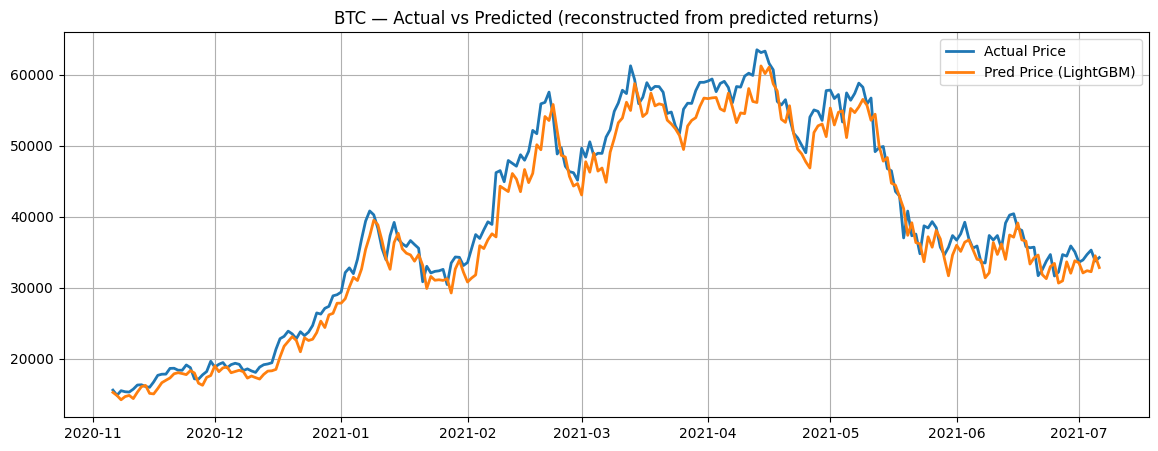

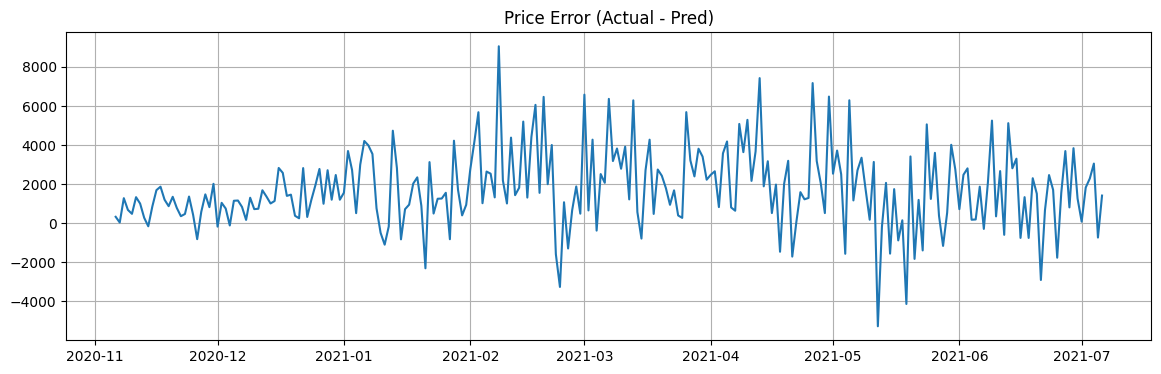

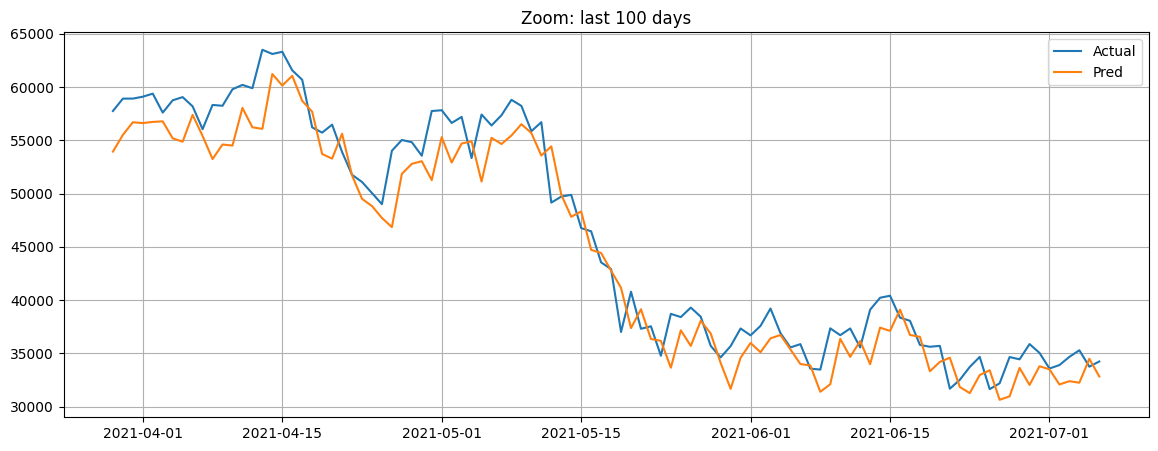

In [124]:
plt.figure(figsize=(14,5))
plt.plot(test.index, actual_price, label="Actual Price", linewidth=2)
plt.plot(test.index, pred_price_lgb, label="Pred Price (LightGBM)", linewidth=2)
plt.title("BTC — Actual vs Predicted (reconstructed from predicted returns)")
plt.grid(True)
plt.legend()
plt.show()

# ошибка по цене
err = actual_price - pred_price_lgb
plt.figure(figsize=(14,4))
plt.plot(test.index, err)
plt.title("Price Error (Actual - Pred)")
plt.grid(True)
plt.show()

# зум последних N
N = 100
plt.figure(figsize=(14,5))
plt.plot(test.index[-N:], actual_price[-N:], label="Actual")
plt.plot(test.index[-N:], pred_price_lgb[-N:], label="Pred")
plt.title(f"Zoom: last {N} days")
plt.grid(True)
plt.legend()
plt.show()


In [152]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb

# =========================
# 0) Load + basic cleaning
# =========================
df_raw = pd.read_csv("coin_Bitcoin.csv")

# Date -> datetime (у тебя там "2013-04-29 23:59:59")
df_raw["Date"] = pd.to_datetime(df_raw["Date"], errors="coerce")
df_raw = df_raw.dropna(subset=["Date"]).sort_values("Date")

# Берём нужные поля, ставим индекс
df = df_raw.set_index("Date")[["Open", "High", "Low", "Close", "Volume"]].copy()

# Обрезаем период (как у тебя)
df = df.loc[df.index >= "2017-01-01"].copy()

# Удаляем дубликаты дат (если есть)
df = df[~df.index.duplicated(keep="last")].copy()

print("Raw:", df.shape, "min:", df.index.min(), "max:", df.index.max())


# =========================
# 1) Target construction
# =========================
# log_return(t) = ln(Close(t)/Close(t-1))
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

# target = log_return(t+1)
df["target"] = df["log_return"].shift(-1)

# Проверка масштаба target (это критично!)
# target должен быть маленький: порядка -0.2..0.2 (обычно ещё меньше)
desc = df["target"].describe()
print("\nTarget describe:\n", desc)

# Если target огромный (тысячи/десятки тысяч) — значит таргет сломан
assert desc["std"] < 1.0, "TARGET SCALE BROKEN: target слишком большой. Он должен быть log-return, а не цена."


# =========================
# 2) Feature engineering
# =========================
# --- lag price
for lag in [1, 2, 3, 7]:
    df[f"close_lag_{lag}"] = df["Close"].shift(lag)

# --- lag returns
for lag in [1, 2, 5]:
    df[f"ret_lag_{lag}"] = df["log_return"].shift(lag)

# --- rolling price stats (ТОЛЬКО прошлое => shift(1))
for w in [7, 14, 30]:
    df[f"roll_mean_{w}"] = df["Close"].rolling(w).mean().shift(1)
df["roll_std_7"]  = df["Close"].rolling(7).std().shift(1)
df["roll_std_30"] = df["Close"].rolling(30).std().shift(1)

# --- rolling return vol
df["roll_ret_std_30"] = df["log_return"].rolling(30).std().shift(1)

# --- EMA (тоже прошлое)
df["ema_7"]  = df["Close"].ewm(span=7, adjust=False).mean().shift(1)
df["ema_14"] = df["Close"].ewm(span=14, adjust=False).mean().shift(1)

# --- time feats
df["weekday"] = df.index.weekday
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

# Финальная чистка
df = df.dropna().copy()

print("\nAfter features:", df.shape)
print("Columns:", list(df.columns))


# =========================
# 3) Time split (train/valid/test)
# =========================
N = len(df)
i1 = int(N * 0.70)
i2 = int(N * 0.85)

train = df.iloc[:i1].copy()
valid = df.iloc[i1:i2].copy()
test  = df.iloc[i2:].copy()

X_train = train.drop(columns=["target"])
y_train = train["target"]

X_valid = valid.drop(columns=["target"])
y_valid = valid["target"]

X_test  = test.drop(columns=["target"])
y_test  = test["target"]

print("\nShapes:", X_train.shape, X_valid.shape, X_test.shape)

# Жёсткая проверка, что y действительно маленький (log-returns), а не цены
for name, y in [("y_train", y_train), ("y_valid", y_valid), ("y_test", y_test)]:
    d = y.describe()
    print(f"\n{name} describe:\n{d}")
    assert d["std"] < 1.0, f"{name} выглядит как НЕ доходность. Проверь target."

# =========================
# 4) Metrics (returns)
# =========================
def eval_returns(name, y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    dir_acc = (np.sign(y_true) == np.sign(y_pred)).mean()
    # корреляция (может быть nan если дисперсия 0)
    corr = np.corrcoef(y_true, y_pred)[0, 1] if (np.std(y_true) > 0 and np.std(y_pred) > 0) else np.nan
    print(f"{name:18s} | MAE={mae:.6f} RMSE={rmse:.6f} DirAcc={dir_acc:.3f} Corr={corr:.3f}")
    return mae, rmse, dir_acc, corr


# =========================
# 5) Baseline: ret=0
# =========================
pred0 = np.zeros_like(y_test.values)
eval_returns("baseline_ret=0", y_test.values, pred0)


# =========================
# 6) LightGBM + early stopping
# =========================
model = lgb.LGBMRegressor(
    n_estimators=20000,
    learning_rate=0.02,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="l2",
    callbacks=[lgb.early_stopping(stopping_rounds=300, verbose=True)]
)

pred_lgb = model.predict(X_test)

# Защитная проверка: предсказания тоже должны быть маленькими
print("\nPred stats:", pd.Series(pred_lgb).describe())
assert np.std(pred_lgb) < 1.0, "Предсказания слишком большие. Это не похоже на log-return."

eval_returns("LightGBM", y_test.values, pred_lgb)
print("Best iteration:", model.best_iteration_)

# =========================
# 7) Feature importance (top 15)
# =========================
imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop-15 features:\n", imp.head(15))


Raw: (1648, 5) min: 2017-01-01 23:59:59 max: 2021-07-06 23:59:59

Target describe:
 count    1647.000000
mean        0.002146
std         0.043087
min        -0.464730
25%        -0.015270
50%         0.002382
75%         0.021004
max         0.225119
Name: target, dtype: float64

After features: (1616, 24)
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'log_return', 'target', 'close_lag_1', 'close_lag_2', 'close_lag_3', 'close_lag_7', 'ret_lag_1', 'ret_lag_2', 'ret_lag_5', 'roll_mean_7', 'roll_mean_14', 'roll_mean_30', 'roll_std_7', 'roll_std_30', 'roll_ret_std_30', 'ema_7', 'ema_14', 'weekday', 'is_weekend']

Shapes: (1131, 23) (242, 23) (243, 23)

y_train describe:
count    1131.000000
mean        0.001860
std         0.042112
min        -0.207530
25%        -0.016297
50%         0.002020
75%         0.021122
max         0.225119
Name: target, dtype: float64

y_valid describe:
count    242.000000
mean       0.002699
std        0.043891
min       -0.464730
25%       -0.008705
50